In [1]:
from IPython.display import display, Markdown
# Markdown content
markdown_content = """
# Heading
This is a **Markdown** cell.


"""
display(Markdown(markdown_content))
# Load data 
# Numeric Feature Exploration 
markdown_content = """

[Jump to Numeric Feature Exploration ](#numeric)


"""
# Render Markdown
display(Markdown(markdown_content))
# Categorical Feature Exploration
markdown_content = """

[Jump to Categorical Feature Exploration ](#categorical)


"""
# Render Markdown
display(Markdown(markdown_content))
# Markdown content
markdown_content = """

[Jump to Summary ](#summary)


"""
# Render Markdown
display(Markdown(markdown_content))

# Log Summary at the end




# Heading
This is a **Markdown** cell.






[Jump to Numeric Feature Exploration ](#numeric)






[Jump to Categorical Feature Exploration ](#categorical)






[Jump to Summary ](#summary)




In [26]:
# Path
from pathlib import Path
import os
# Dataframe manipulate
import pandas as pd
# Missing info
import missingno as msno

# Numpy for data transformation
import numpy as np
# Visualization
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = Path("../../data/house_pricing")

# Detect files in folder
for root, dirs, files in os.walk(DATA_DIR):
        print()
        # Print the current directory
        print(f"Directory: {root}")
        
        # Print all files in the current directory
        for file in files:
            print(f"File: {os.path.join(root, file)}")
        
        # Print all subdirectories in the current directory
        for dir in dirs:
            print(f"Subdirectory: {os.path.join(root, dir)}")


Directory: ..\..\data\house_pricing
File: ..\..\data\house_pricing\test.csv
File: ..\..\data\house_pricing\train.csv


In [7]:
# Load data 
df = pd.read_csv(DATA_DIR / "train.csv")

In [8]:
print(Path(DATA_DIR))

..\..\data\house_pricing


In [9]:
# Understand the Data
df.sample(5)
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# get column info
df.info()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# print("Categorical Columns: %i"%len(categorical_cols), categorical_cols, )

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
# print("Numeric Columns: %i"%len(numeric_cols),  numeric_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Numeric Feature Exploration 
markdown_content = '''
<span id="summary"></span>
'''
display(Markdown(markdown_content))


<span id="summary"></span>


In [12]:
# Summary here, also prune cols to remove from EDA


'''
    Summary
    - 1460 rows, 80 columns, 43 categorical cols and 38 numeric cols
    Missing Data
    - missing data exists
    Skewness
    - It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.
    - np.log(target) to tranform to improve skewness
    Correlation
    - observations :
                    1. 'OverallQual', 'GrLivArea' and 'GarageCars' are strongly correlated with 'SalePrice'.
                    2.'TotRmsAbvGrd' and 'GrLivArea', twins, pick GrLivArea 
                    3. 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
                    4. 'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'
                    
                    'YearBuilt' it appears like is slightly correlated with 'SalePrice'. This required more analysis to arrive at a conclusion may be do some time series analysis.
    - pick standard: >= 0.5, and exlcude those that highly correlated, final pick ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
    Pair Plot
     - observations :
                    1. 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.
                    2. between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function.We can also see this same tendency in the upper limit of the 'dots cloud'
                    3. prices are increasing faster now with respect to previous years (from SalePrice and 'YearBuilt','YearRemodAdd').
                 
    
    
    

'''
cols_to_remove = ["Id"]

# Subtract elements of list2 from list1
numeric_cols = [x for x in numeric_cols if x not in cols_to_remove]

In [13]:
# 
markdown_content = '''
<span id="numeric"></span>
'''
display(Markdown(markdown_content))


<span id="numeric"></span>


In [14]:
# get numberic info
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
# Missing data info
df.isnull().sum()

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)
# TODO correlation between feature in absence or presence


,Total Missing Count,% of Total Observations
Numeric Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479


In [74]:
# Visualization Config
sns.set_palette("Pastel1")

<Axes: >

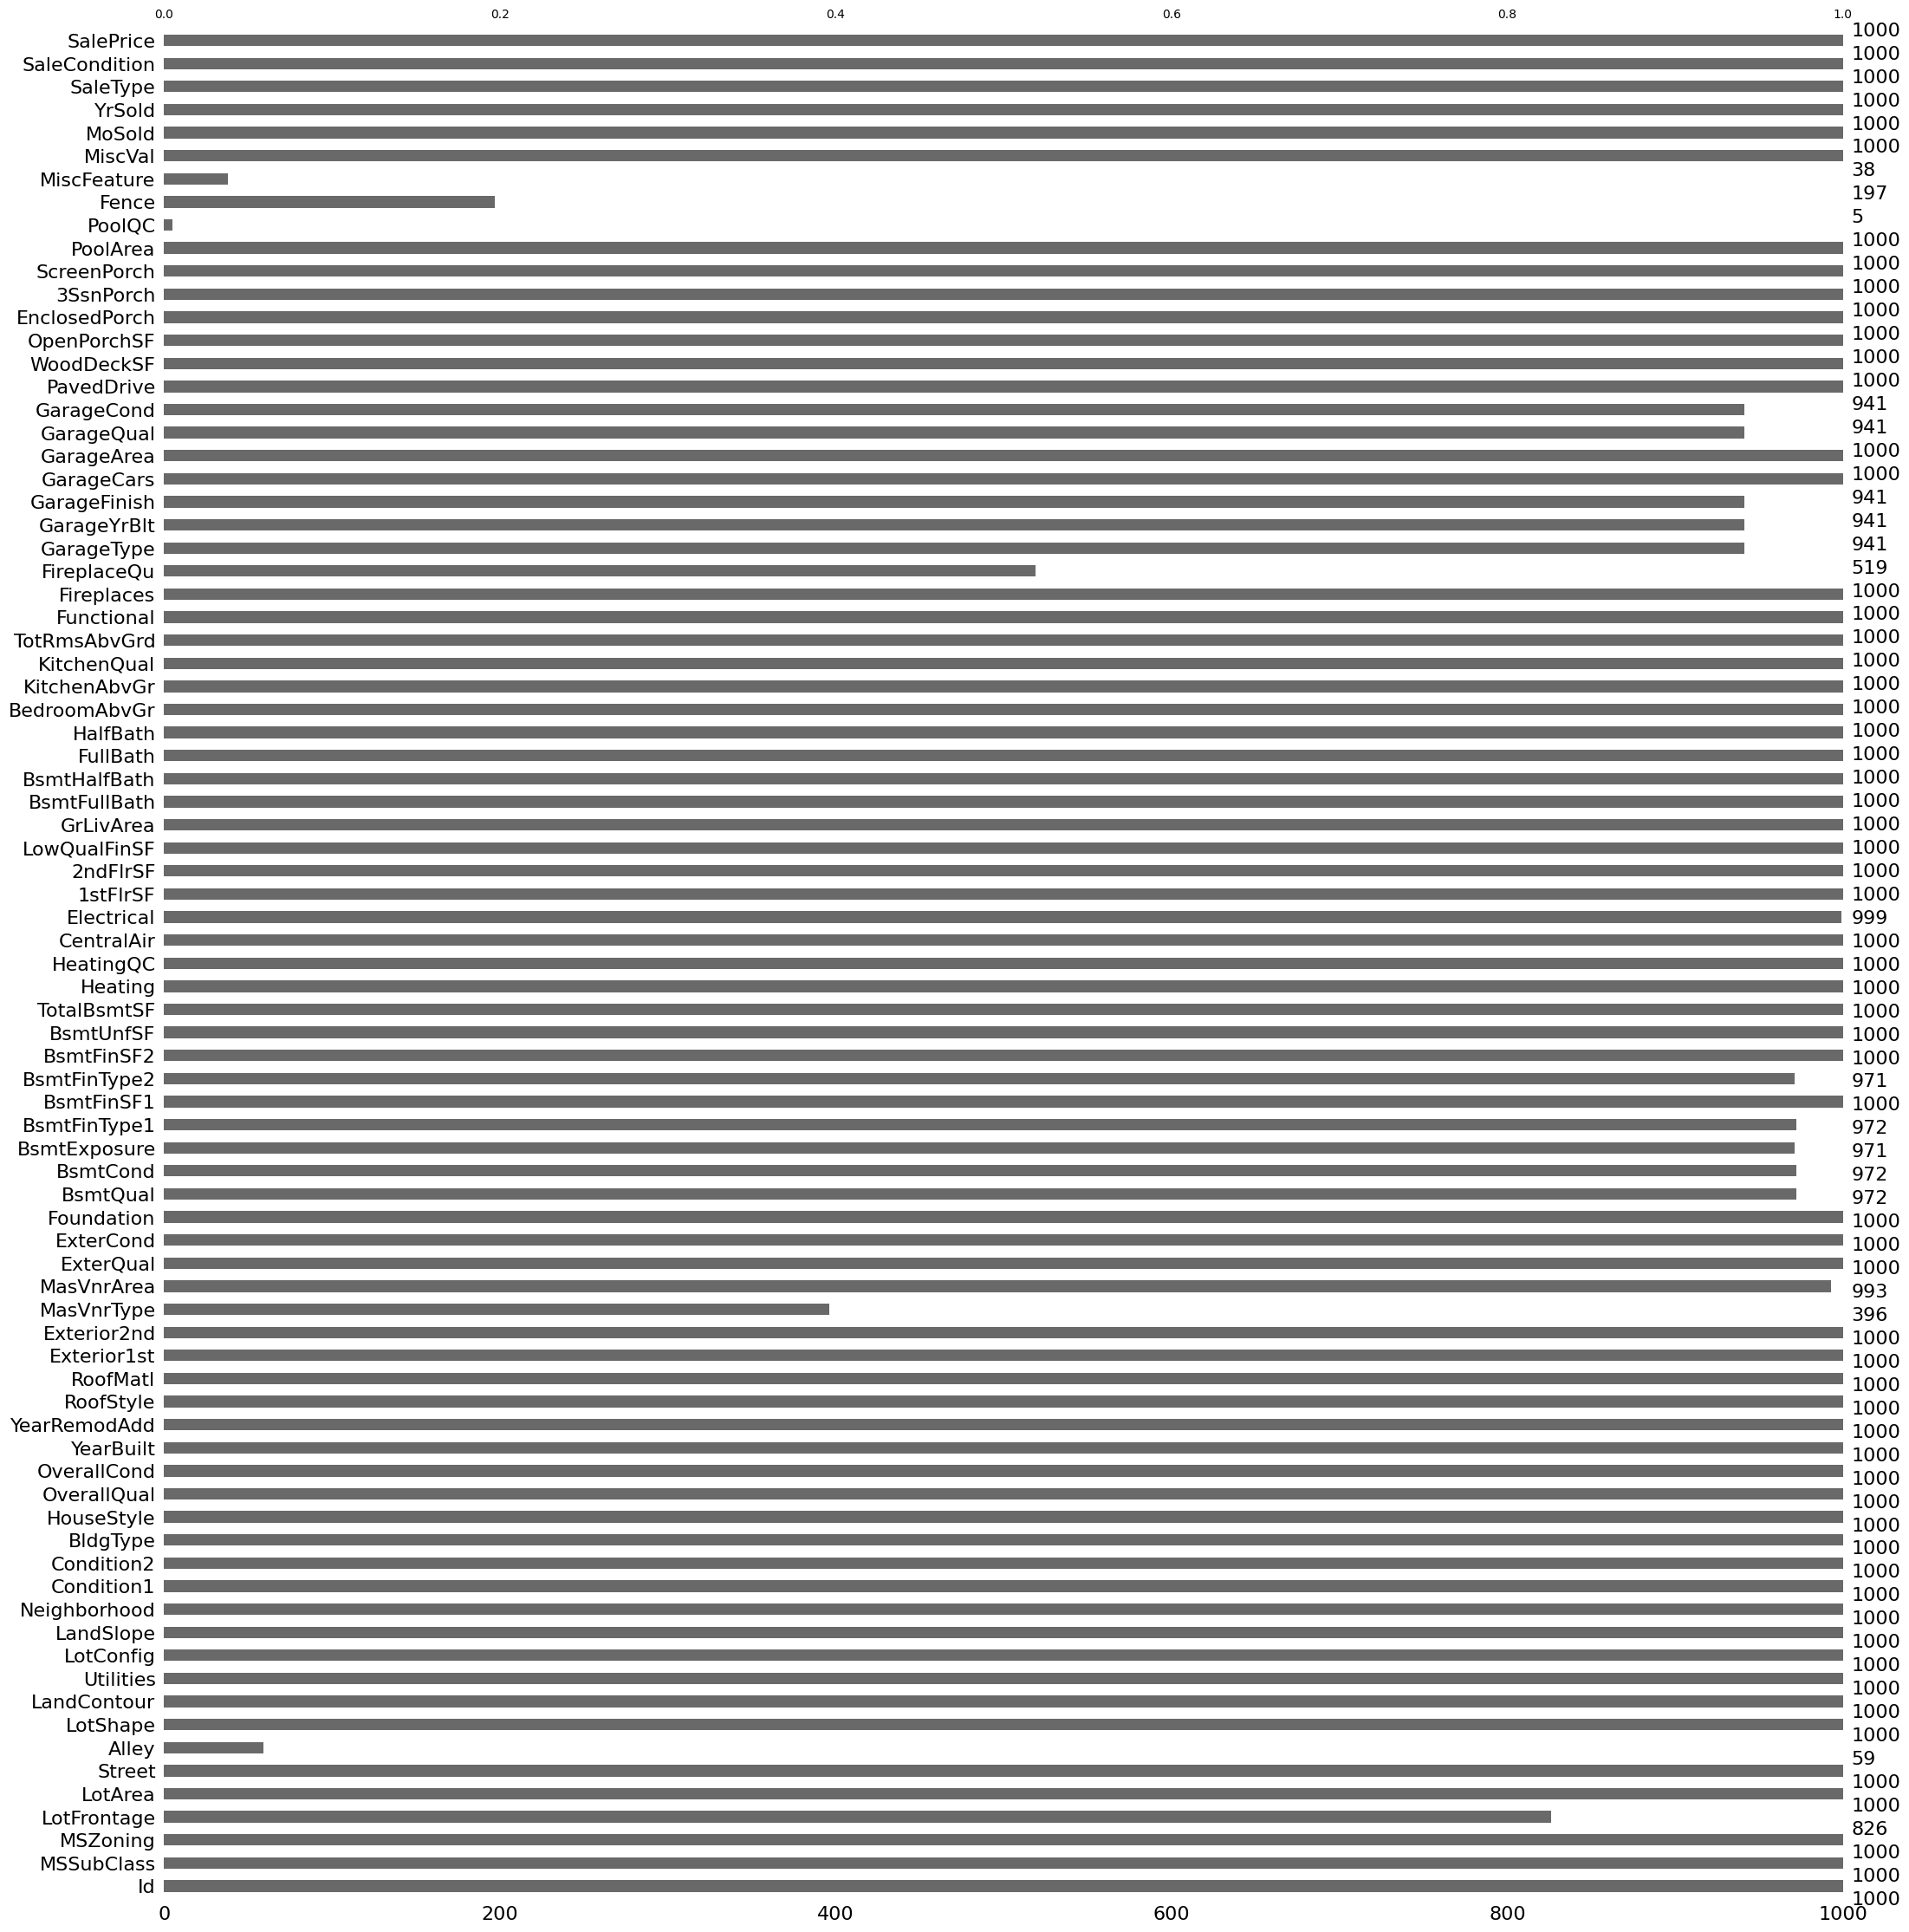

In [17]:
# Visualize missing info
msno.bar(df.sample(1000))

In [46]:
# Skew
skew = df.select_dtypes(include=['number']).skew()
skew

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [65]:
# Function: plot_hist
# Description: Plot hist chart with skew or kurt info added
# Parameters:
#   target_col (str): Column Name
#   data (DataFrame Series): data source in df series format
#   opt (str): option "skew" or "kurt"
# Returns:
#   float: The discount amount.
def plot_hist(target_col, data, opt):
    feature = target_col
    plt.figure(figsize=(14,  3))
    sns.histplot(data, kde = True)
    if opt == "skew":
        plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")
    elif opt == "kurt":
        plt.title(f"{feature} | Kurtosis: {round(data.kurt(), 2)}")
    else:
        print("Invalid opt given, only 'skew' and 'kurt' allowed")
        return
    
    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()
    

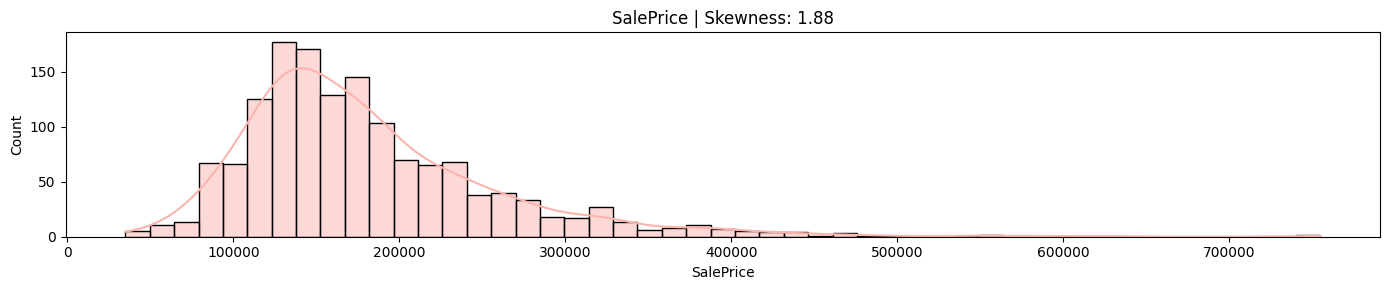

In [57]:
# visualize skew for target col
plot_hist('SalePrice', df['SalePrice'], 'skew')

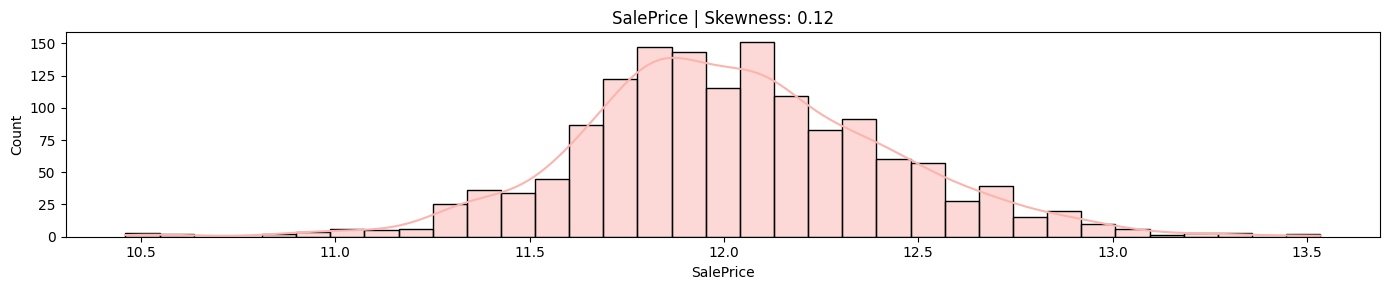

In [58]:
# Data Transform for target col
target = np.log(df['SalePrice'])
target.skew()
plot_hist('SalePrice', target, 'skew')

In [66]:
# Kurt
kurt = df.select_dtypes(include=['number']).kurt()
kurt

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

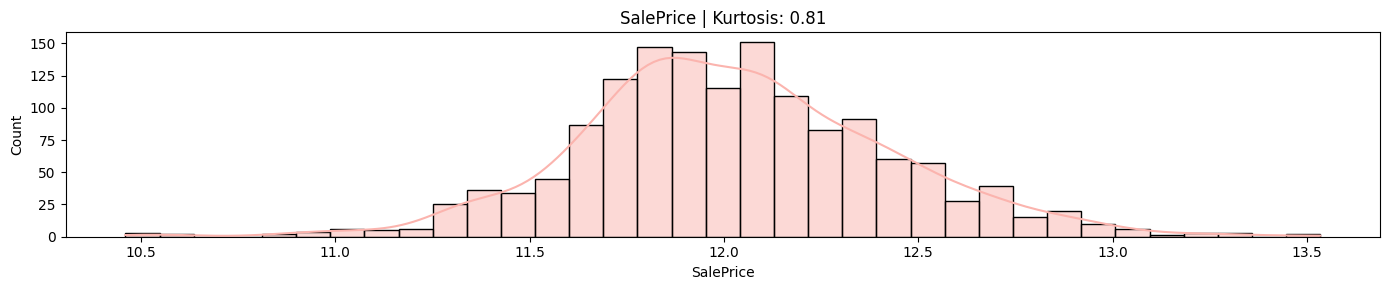

In [70]:
# Visualize Kurtosis after tranformation
plot_hist('SalePrice', target, 'kurt')

In [71]:
# Correlation
correlation = df.select_dtypes(include=['number']).corr()
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


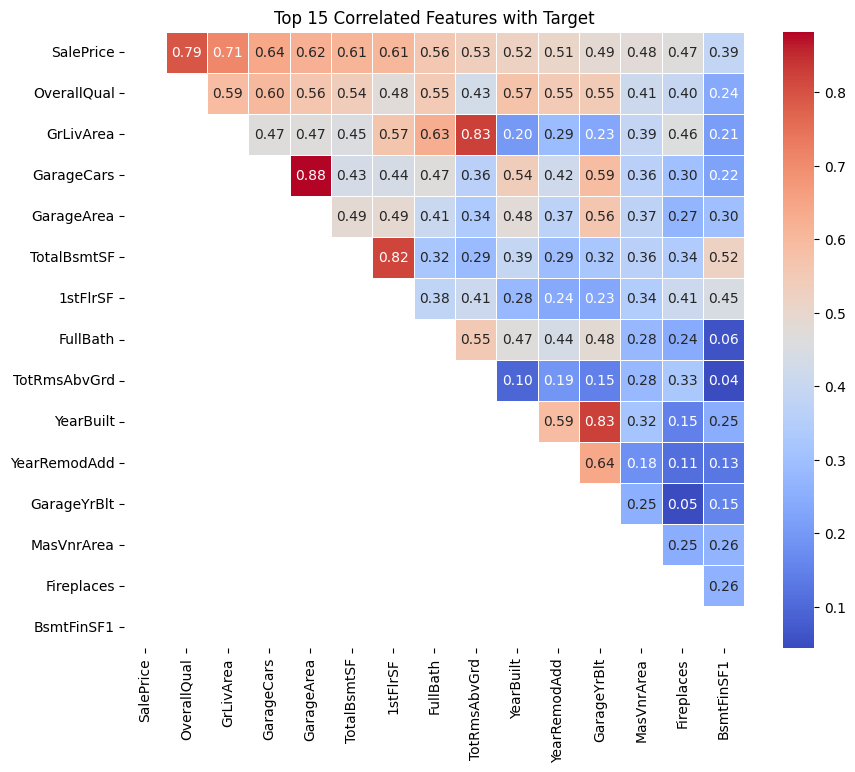

In [72]:
# Visualize Correlation
# Select k nlargest features to plot
k = 15
cols = correlation.abs().nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
# Create a heatmap of the correlation matrix for selected features
correlation_subset = df[cols].corr()

# Mask upper triangle (including diagonal)
mask = np.tril(np.ones_like(correlation_subset, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Top {k} Correlated Features with Target')
plt.show()

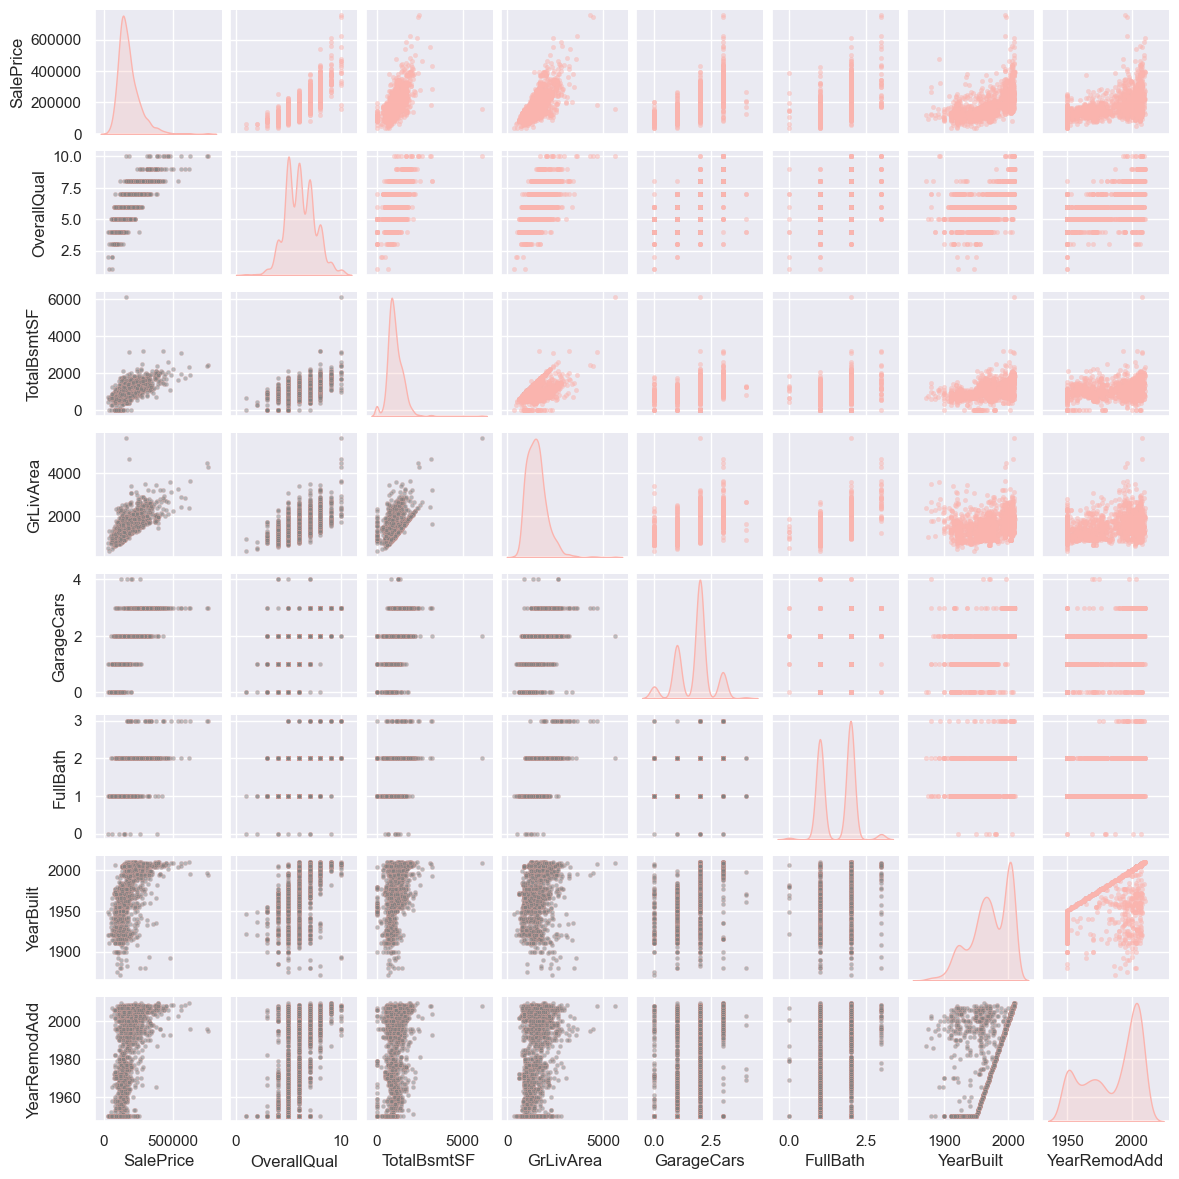

In [78]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
pairplot = sns.pairplot(df[columns], height=1.5, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10, 'edgecolor': None}, diag_kws={'fill': True})

# Set color for the lower triangular part of the pairplot
for i, j in zip(*np.tril_indices_from(pairplot.axes, -1)): 
    pairplot.axes[i, j].get_children()[0].set_facecolor('grey')
plt.show()

In [237]:
# Categorical Feature Exploration
markdown_content = '''
<span id="categorical"></span>
'''
display(Markdown(markdown_content))


<span id="categorical"></span>


In [230]:
for column_name in df.columns:
    if df[column_name].dtypes == 'object':
        df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])
        unique_category = len(df[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))
 

Feature 'MSZoning' has '5' unique categories
Feature 'Street' has '2' unique categories
Feature 'Alley' has '2' unique categories
Feature 'LotShape' has '4' unique categories
Feature 'LandContour' has '4' unique categories
Feature 'Utilities' has '2' unique categories
Feature 'LotConfig' has '5' unique categories
Feature 'LandSlope' has '3' unique categories
Feature 'Neighborhood' has '25' unique categories
Feature 'Condition1' has '9' unique categories
Feature 'Condition2' has '8' unique categories
Feature 'BldgType' has '5' unique categories
Feature 'HouseStyle' has '8' unique categories
Feature 'RoofStyle' has '6' unique categories
Feature 'RoofMatl' has '8' unique categories
Feature 'Exterior1st' has '15' unique categories
Feature 'Exterior2nd' has '16' unique categories
Feature 'MasVnrType' has '3' unique categories
Feature 'ExterQual' has '4' unique categories
Feature 'ExterCond' has '5' unique categories
Feature 'Foundation' has '6' unique categories
Feature 'BsmtQual' has '4' u